In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [26]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1') 

In [27]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [28]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.columns = ['class', 'sms']
df.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.describe()

,class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


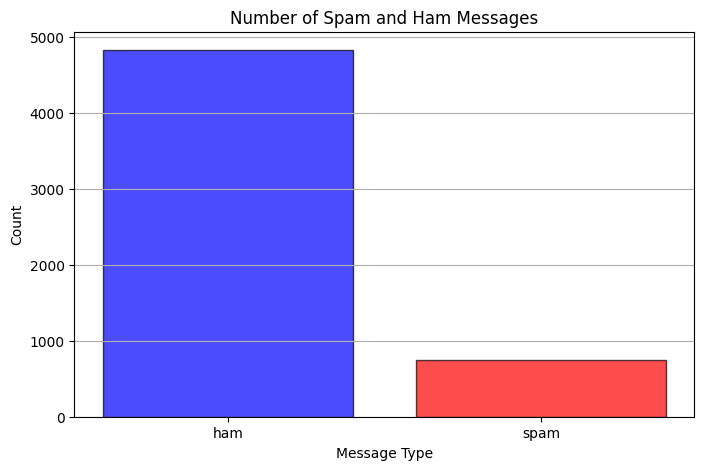

In [17]:
import matplotlib.pyplot as plt

label_counts = df['class'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'], edgecolor='k', alpha=0.7)
plt.title('Number of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(label_counts.index)
plt.grid(axis='y')
plt.show()


In [9]:
df['sms'].apply(len).mean()

80.11880832735105

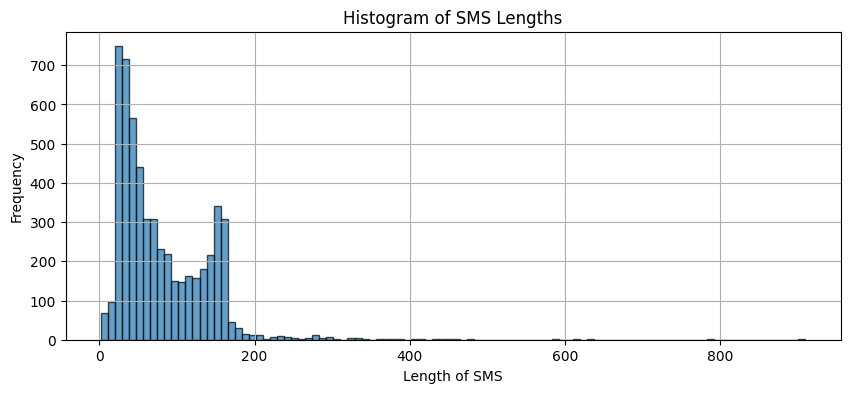

In [10]:
import matplotlib.pyplot as plt
len_data = df['sms'].apply(len)

plt.figure(figsize=(10, 4))
plt.hist(len_data, bins=100, edgecolor='k', alpha=0.7)
plt.title('Histogram of SMS Lengths')
plt.xlabel('Length of SMS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Add sms length

In [30]:
df['sms_len'] = df['sms'].apply(len)
df.head()

,class,sms,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


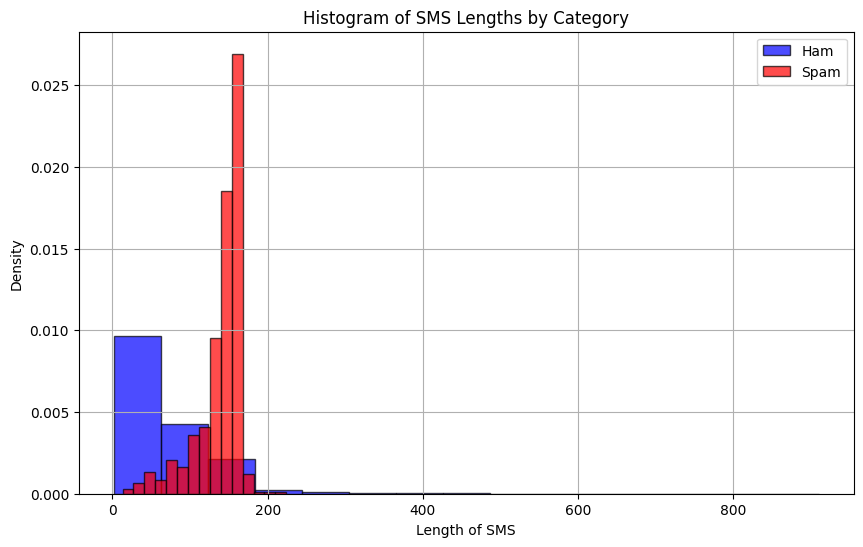

In [23]:
spam_lengths = df[df['class'] == 'spam']['sms'].apply(len)
ham_lengths = df[df['class'] == 'ham']['sms'].apply(len)

plt.figure(figsize=(10, 6))

# Plot for ham
plt.hist(ham_lengths,density=True,  bins=15, color='blue', edgecolor='k', alpha=0.7, label='Ham')

# Plot for spam
plt.hist(spam_lengths,density=True,  bins=15, color='red', edgecolor='k', alpha=0.7, label='Spam')

plt.title('Histogram of SMS Lengths by Category')
plt.xlabel('Length of SMS')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Data preprocessing

In [32]:
df['class'] = df['class'].map({'spam': 1, 'ham': 0})
df.head()

,class,sms,sms_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

def preprocess_sms(sms):
    sms = sms.lower()
    # Remove punctuation
    sms = re.sub(f'[{string.punctuation}]', '', sms)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    # Remove numbers
    sms = re.sub(r'\d+', '', sms)
    sms = ' '.join([word for word in sms.split() if word not in stop_words])
    return sms

df['sms'] = df['sms'].apply(preprocess_sms)

df.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,sms,sms_len,cleaned_sms_len,words,num_of_words
0,0,go jurong point crazy available bugis n great ...,111,82,"[go, jurong, point, crazy, available, bugis, n...",16
1,0,ok lar joking wif u oni,29,23,"[ok, lar, joking, wif, u, oni]",6
2,1,free entry wkly comp win fa cup final tkts st ...,155,135,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
3,0,u dun say early hor u c already say,49,35,"[u, dun, say, early, hor, u, c, already, say]",9
4,0,nah dont think goes usf lives around though,61,43,"[nah, dont, think, goes, usf, lives, around, t...",8


In [46]:
df['cleaned_sms_len'] = df['sms'].apply(len)
df.head()

,class,sms,sms_len,cleaned_sms_len,words,num_of_words
0,0,go jurong point crazy available bugis n great ...,111,82,"[go, jurong, point, crazy, available, bugis, n...",16
1,0,ok lar joking wif u oni,29,23,"[ok, lar, joking, wif, u, oni]",6
2,1,free entry wkly comp win fa cup final tkts st ...,155,107,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
3,0,u dun say early hor u c already say,49,35,"[u, dun, say, early, hor, u, c, already, say]",9
4,0,nah dont think goes usf lives around though,61,43,"[nah, dont, think, goes, usf, lives, around, t...",8


In [47]:
words = []
length_of_sms = []

for sms in df['sms']:
    tokens = nltk.word_tokenize(sms)
    words.append(tokens)
    length_of_sms.append(len(tokens))


df['words'] = words
df['num_of_words'] = length_of_sms

df.head()

,class,sms,sms_len,cleaned_sms_len,words,num_of_words
0,0,go jurong point crazy available bugis n great ...,111,82,"[go, jurong, point, crazy, available, bugis, n...",16
1,0,ok lar joking wif u oni,29,23,"[ok, lar, joking, wif, u, oni]",6
2,1,free entry wkly comp win fa cup final tkts st ...,155,107,"[free, entry, wkly, comp, win, fa, cup, final,...",20
3,0,u dun say early hor u c already say,49,35,"[u, dun, say, early, hor, u, c, already, say]",9
4,0,nah dont think goes usf lives around though,61,43,"[nah, dont, think, goes, usf, lives, around, t...",8


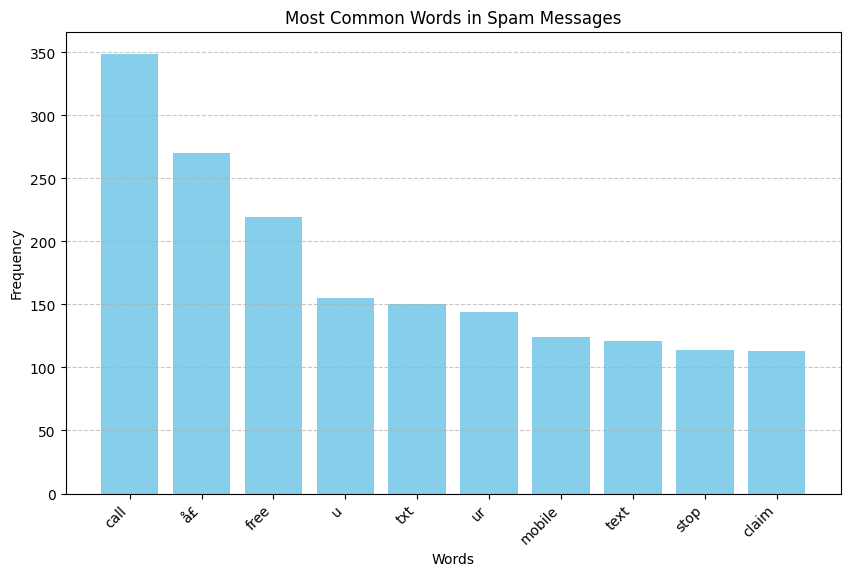

In [48]:
from collections import Counter

spam_df = df[df['class'] == 1]

# Combine all the words from the 'words' column into a single list
all_spam_words = [word for sublist in spam_df['words'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_spam_words)

# Find the most frequent words
most_common_words = word_counts.most_common(10)  # Get the top 10 most common words

words, counts = zip(*most_common_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Spam Messages')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

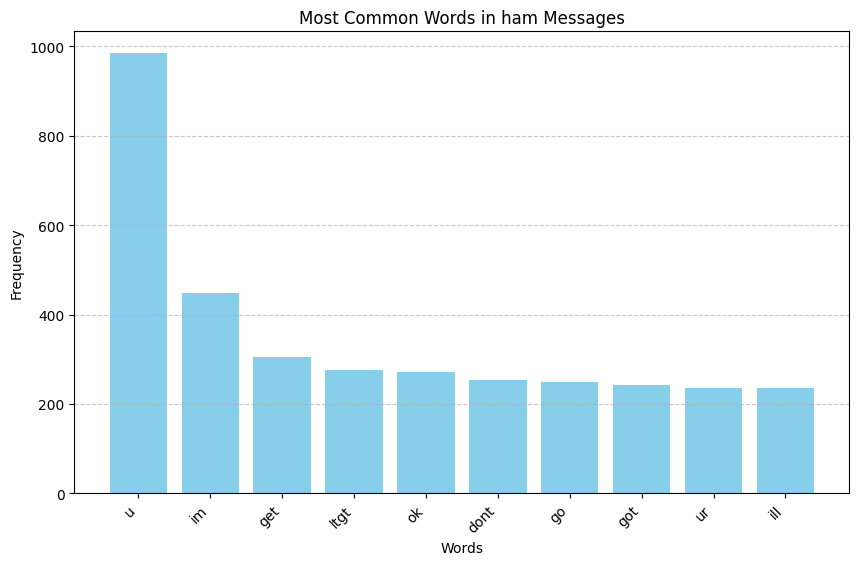

In [50]:
from collections import Counter

ham_df = df[df['class'] == 0]

all_ham_words = [word for sublist in ham_df['words'] for word in sublist]

word_counts = Counter(all_ham_words)

most_common_words = word_counts.most_common(10)  

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in ham Messages')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: >

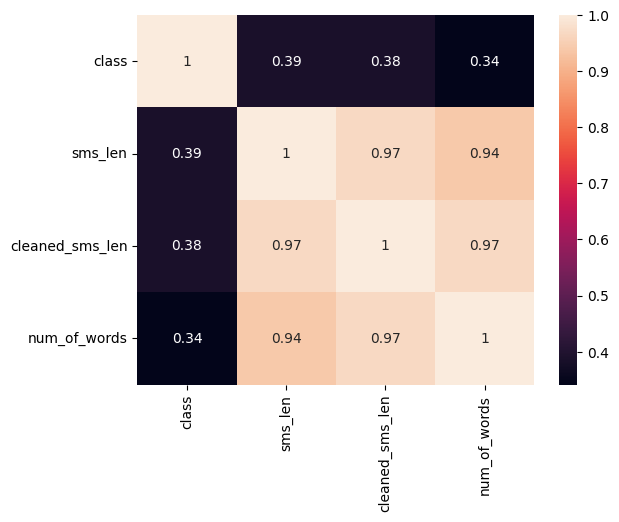

In [58]:
import seaborn as sns
corr_df = df.drop(columns = ['sms', 'words'])
sns.heatmap(corr_df.corr(), annot=True)

# Feature Exctraction

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    use_idf=True,          # Use inverse document frequency
    smooth_idf=True,       # Smooth IDF weights by adding 1 to document frequencies
    norm='l2'              # Normalize term frequencies
)


tfidf_matrix = tfidf_vectorizer.fit_transform(df['sms'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()


,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,ìï,ìïll,ûthanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split and train

In [59]:
X = tfidf_df
y=df['class']
print(X.shape)
print(y.shape)

(5572, 8464)
(5572,)


In [60]:
from sklearn.model_selection import train_test_split 


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457, 8464)
Shape of y_train: (4457,)
Shape of X_test: (1115, 8464)
Shape of y_test: (1115,)


In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [67]:
NB =  MultinomialNB()
SVM = SVC(kernel='linear', probability=True)
LR = LogisticRegression()
RF = RandomForestClassifier()
XGB =  xgb.XGBClassifier()


accuracy_scores = []
precision_scores = []
f1_scores = []
model_names = []


In [69]:
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
model_names.append('NB')

In [74]:
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
model_names.append('SVM')

In [71]:
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
model_names.append('LR')

In [72]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
model_names.append('RF')

In [73]:
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
model_names.append('XGB')

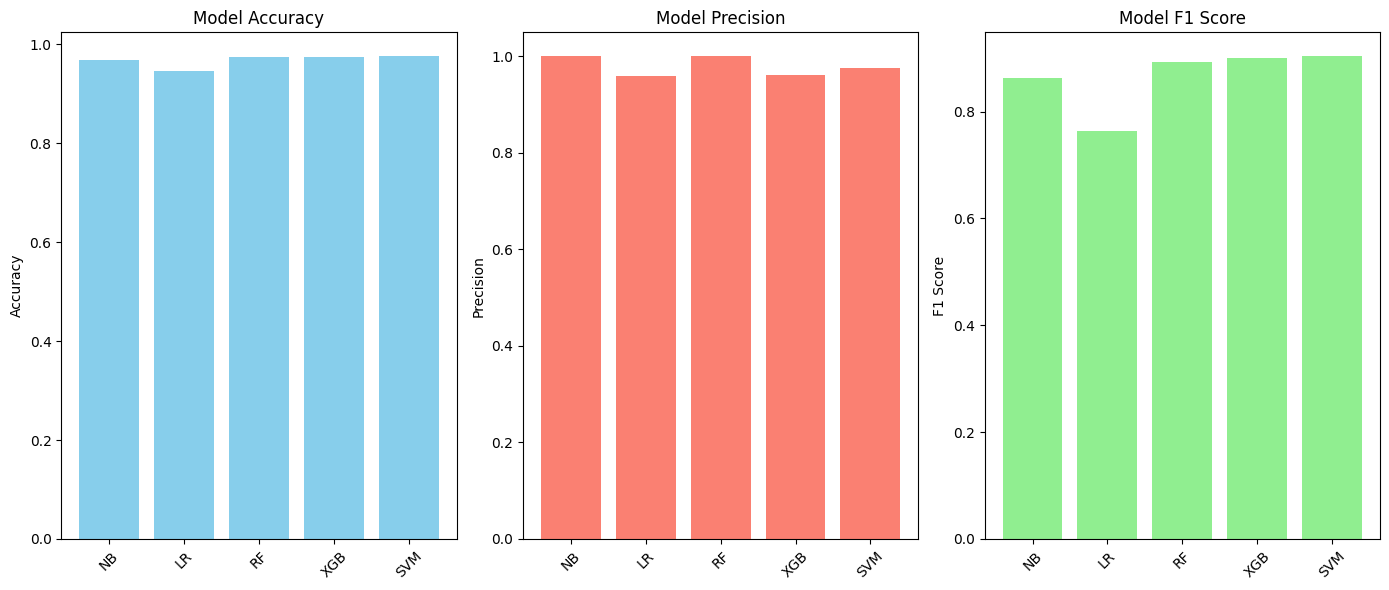

In [75]:
x = range(len(model_names))

plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 3, 1)
plt.bar(x, accuracy_scores, color='skyblue')
plt.xticks(x, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Precision
plt.subplot(1, 3, 2)
plt.bar(x, precision_scores, color='salmon')
plt.xticks(x, model_names, rotation=45)
plt.ylabel('Precision')
plt.title('Model Precision')

# F1 Score
plt.subplot(1, 3, 3)
plt.bar(x, f1_scores, color='lightgreen')
plt.xticks(x, model_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Model F1 Score')

plt.tight_layout()
plt.show()
